Lista de Exercícios 3

01) Prova de 2012 - Questão 4;

02) Prova de 2017 - Questão 4;

03) Proponha uma função J ( x ), sendo x um vetor com 20 dimensões, cujo ponto mínimo você conheça. Evite propor funções que tenham um só ponto mínimo. Encontre o ponto mínimo global utilizando S.A. Entregue o código utilizado e alguns comentários sobre o resultado obtido;

04) Questão extra (opcional): Prova de 2009 - Questão 4.

# 01) Prova de 2012 - Questão 4;

## a) e b)

Matrizes $P_{x|y}$ para $T = 10$ e $T = 0.1$:

In [39]:
import numpy as np

P=5; NC=3;
cluster_centers = np.transpose(np.array([[0,0],[1, 1],[-1, -1]]))

data_vectors= np.transpose(np.array([[5,4],[4, 5],[5, 5],[-5, -4],[-4, -5]]))

X=data_vectors; M,N=np.shape(X); K=NC; Y=cluster_centers;
d=np.zeros([K,N])
p_ygivenx=np.zeros([K,N])
T = 10

for n in range(0,N):
        for k in range(0,K):
            d[k,n]=np.sum(np.power(X[:,n]-Y[:,k],2))
            p_ygivenx[k,n]=np.exp(-d[k,n]/T)
            
print("Matriz Px|y - T=10: \n", p_ygivenx)

P=5; NC=3;
cluster_centers = np.transpose(np.array([[0,0],[1, 1],[-1, -1]]))

data_vectors= np.transpose(np.array([[5,4],[4, 5],[5, 5],[-5, -4],[-4, -5]]))

X=data_vectors; M,N=np.shape(X); K=NC; Y=cluster_centers;
d=np.zeros([K,N])
p_ygivenx=np.zeros([K,N])
T = 0.1

for n in range(0,N):
        for k in range(0,K):
            d[k,n]=np.sum(np.power(X[:,n]-Y[:,k],2))
            p_ygivenx[k,n]=np.exp(-d[k,n]/T)
            
print("\nMatriz Px|y - T=0.1: \n", p_ygivenx)

Matriz Px|y - T=10: 
 [[0.01657268 0.01657268 0.00673795 0.01657268 0.01657268]
 [0.082085   0.082085   0.0407622  0.00224287 0.00224287]
 [0.00224287 0.00224287 0.00074659 0.082085   0.082085  ]]

Matriz Px|y - T=0.1: 
 [[8.69485652e-179 8.69485652e-179 7.12457641e-218 8.69485652e-179
  8.69485652e-179]
 [2.66919022e-109 2.66919022e-109 1.06112315e-139 1.20327817e-265
  1.20327817e-265]
 [1.20327817e-265 1.20327817e-265 2.03223080e-313 2.66919022e-109
  2.66919022e-109]]


Implementação do DA

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.spatial import Voronoi, voronoi_plot_2d

# Data

np.random.seed(1); P=5; NC=3;
cluster_centers = np.transpose(np.array([[0,0],[1, 1],[-1, -1]]))

data_vectors= np.transpose(np.array([[5,4],[4, 5],[5, 5],[-5, -4],[-4, -5]]))
    

In [25]:

# Main Loop

X=data_vectors; M,N=np.shape(X); K=NC; Y=cluster_centers; 
T=10; alpha=0.9; i=0; fim=0; epsilon=1e-6; delta=1e-3;
d=np.zeros([K,N])
p_ygivenx=np.zeros([K,N])
I=200
J=np.zeros(I)
D=np.zeros(I)
LocalT=np.zeros(I)
 
while not(fim):

    # Partition Condition
    for n in range(0,N):
        for k in range(0,K):
            d[k,n]=np.sum(np.power(X[:,n]-Y[:,k],2))
            p_ygivenx[k,n]=np.exp(-d[k,n]/T)
    Zx=np.sum(p_ygivenx,axis=0)   
    p_ygivenx=p_ygivenx/np.tile(Zx,(K,1))

    # Centroid Condition
    Y=np.zeros([M,K])
    for k in range(0,K):
        y=np.zeros(M)
        w=0
        for n in range(0,N):
            y+=p_ygivenx[k,n]*X[:,n]
            w+=p_ygivenx[k,n]
        Y[:,k]=y/w
        
    # Cost Function and Loop Control
    J[i]=-T/N*np.sum(np.log(Zx))
    D[i]=np.mean(np.sum(p_ygivenx*d,axis=0))
    LocalT[i]=T
    if (i>0):
        if abs(J[i]-J[i-1])/abs(J[i-1])<delta:
            T=alpha*T
            Y=Y+epsilon*np.random.normal(0,1,np.shape(Y))
#     print([i,J[i],D[i],LocalT[i]])   
    i+=1
    if (T<0.1)or(i==I): fim=1



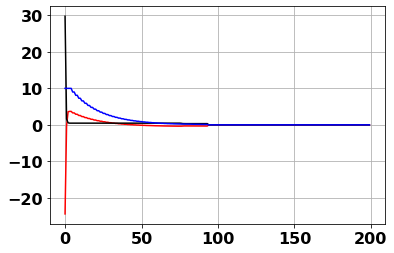

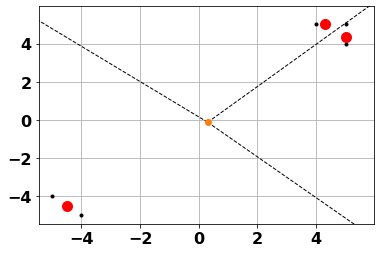

In [30]:
plt.rc('font',size=16,weight='bold')

plt.figure()
plt.plot(-J,'r-',D,'k-',LocalT,'b-')
plt.grid()

vor=Voronoi(Y.T)
fig=voronoi_plot_2d(vor)
plt.plot(data_vectors[0,:],data_vectors[1,:],'k.')
plt.plot(Y[0,:],Y[1,:],'r.',markersize=20)
plt.grid()
plt.show() 

In [27]:
Y

array([[ 4.99999755,  4.29756684, -4.49999989],
       [ 4.36563704,  4.99999806, -4.50000037]])

# 03) Proponha uma função J ( x ), sendo x um vetor com 20 dimensões, cujo ponto mínimo você conheça. Evite propor funções que tenham um só ponto mínimo. Encontre o ponto mínimo global utilizando S.A. Entregue o código utilizado e alguns comentários sobre o resultado obtido;

Ver html que acompanha esse notebook.